In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###  Import Library yang digunakan

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from matplotlib import colors
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
from sklearn. preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


# Membaca CSV


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Customer_Data.csv")
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
#Membuat Data Frame
df = pd.DataFrame(data)
#Melihat analisa Data (Count,Unique,Top,Freq,Mean,Std,Min,25%,50%,75%, dan max)
df.describe(include = "all")

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [ ]:
print("Jumlah Data :") 
print(df.shape[0])
print("Jumlah Attribute :") 
print(df.shape[1])

Jumlah Data :
8950
Jumlah Attribute :
18


# Eksplorasi Data

In [ ]:
## Melihat Tipe Data, Total Data Unik, Total Data Kosong
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['Kolom','Type Data','Data Value Unik','Total Data Kosong']
    return df_check 
check(df)

,Kolom,Type Data,Data Value Unik,Total Data Kosong
0,CUST_ID,object,8950,0
1,BALANCE,float64,8871,0
2,BALANCE_FREQUENCY,float64,43,0
3,PURCHASES,float64,6203,0
4,ONEOFF_PURCHASES,float64,4014,0
5,INSTALLMENTS_PURCHASES,float64,4452,0
6,CASH_ADVANCE,float64,4323,0
7,PURCHASES_FREQUENCY,float64,47,0
8,ONEOFF_PURCHASES_FREQUENCY,float64,47,0
9,PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0


In [ ]:
# Melihat Missing Value Yang ada di Minimum Payments
Nulls = pd.isnull(df["MINIMUM_PAYMENTS"])
df[Nulls]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [ ]:
# Melihat Missing Value Yang ada di Credit Limit
Nulls = pd.isnull(df["CREDIT_LIMIT"])
df[Nulls]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [ ]:
#Melakukan Drop Pada Kolom Customer ID karena Informasi yang ingin dicari tidak berkaitan dengan attribute ini.
df.drop(columns='CUST_ID',inplace=True)

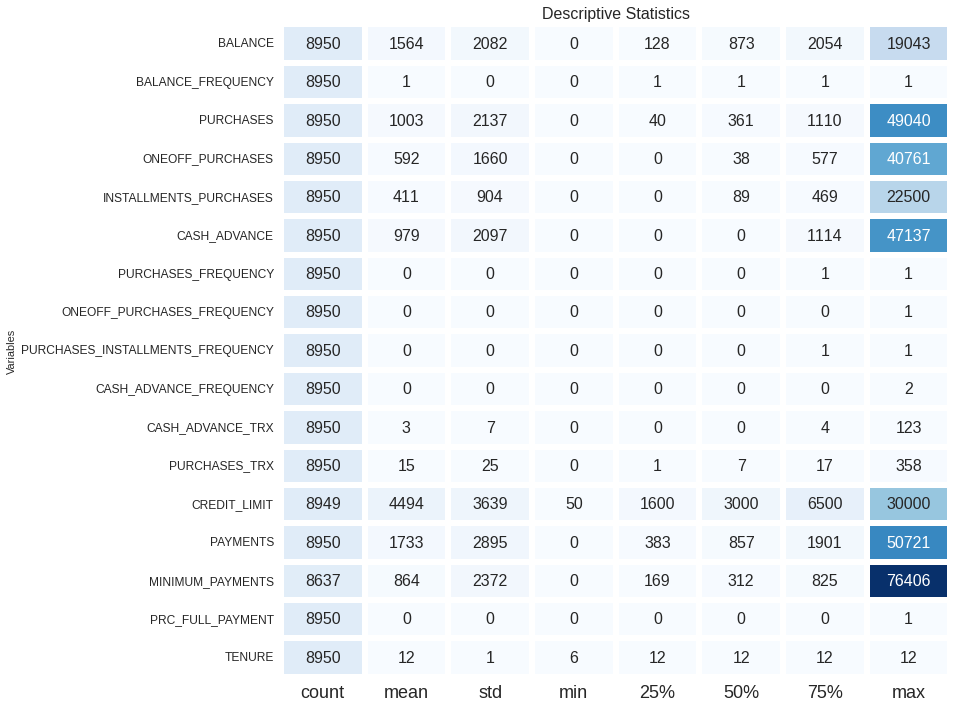

In [ ]:
# Menampilkan detail data setelah melakukan remove pada attribute Customer ID
desc = df.describe().T
df2 = pd.DataFrame(index=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE' ], 
                   columns= ["count","mean","std","min",
                             "25%","50%","75%","max"], data= desc )

f,ax = plt.subplots(figsize=(12,12))

sns.heatmap(df2, annot=True,cmap = "Blues", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

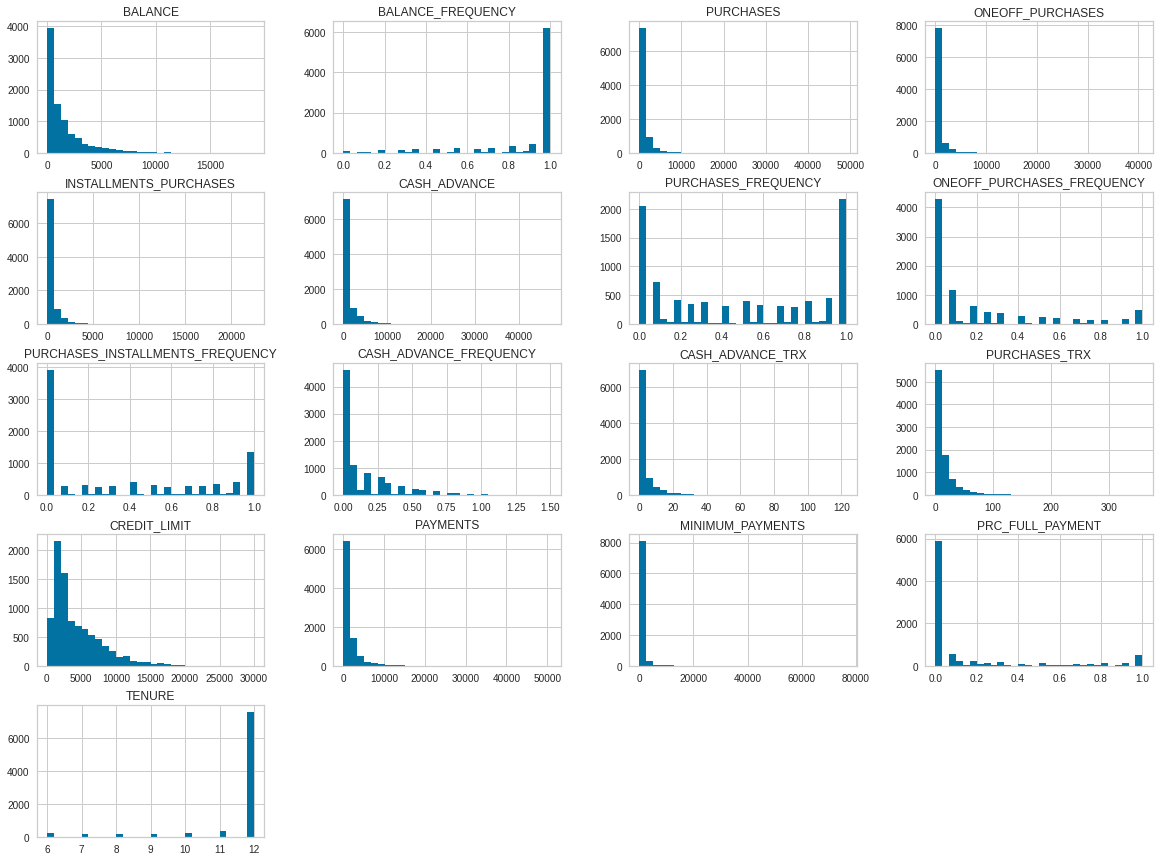

In [ ]:
#Menampilkan distribusi data
df.hist(bins=30,figsize=(20,15))
plt.show()

# Korelasi **Data**

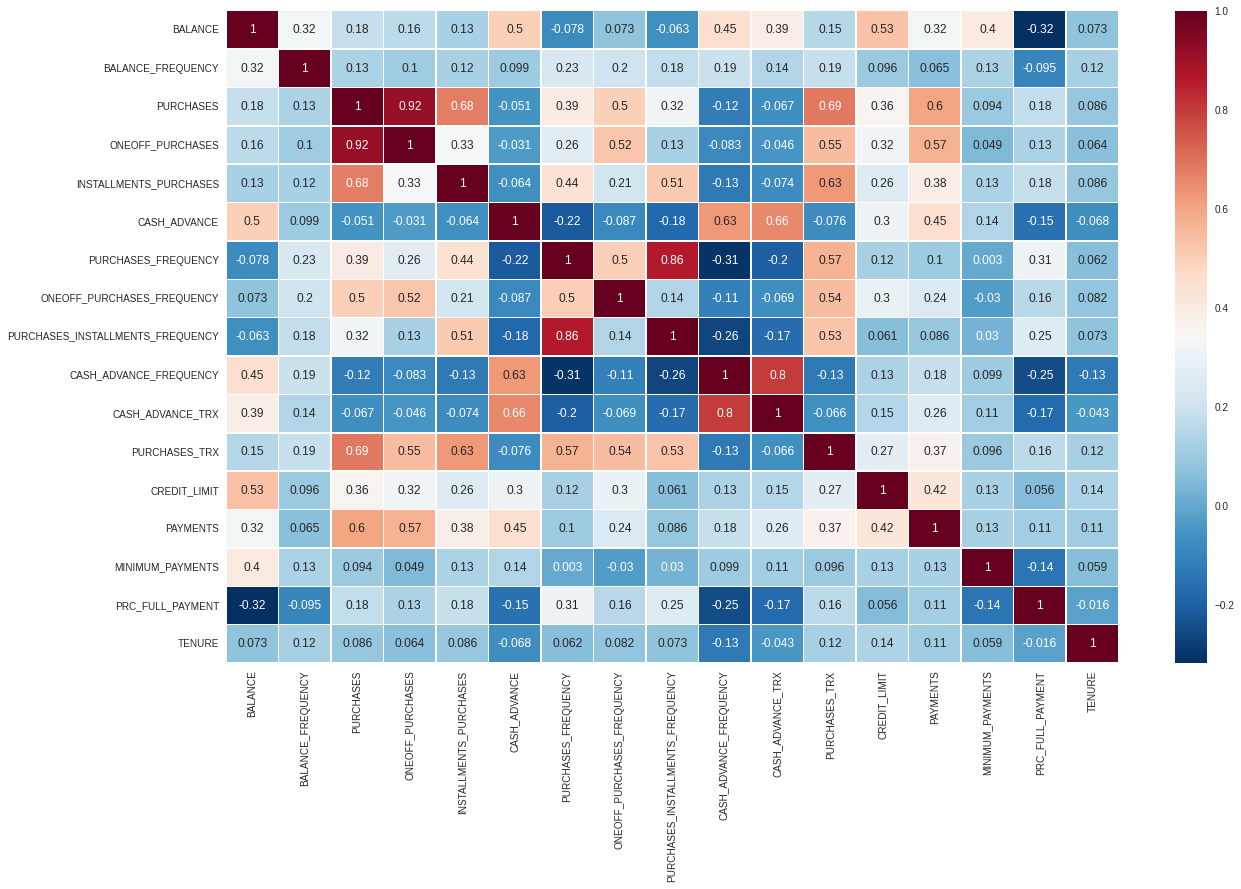

In [ ]:
## Menampilkan Korelasi dari setiap attributenya. Semakin tinggi bewarna Merah Tertinggi (ONEOFF_PURCHASES_FREQUENCY dengan PURCHASES) dan terendah bewarna biru putih
fig, ax = plt.subplots(figsize = (20, 12)) #Size of plot
ax = sns.heatmap(df.corr(),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

In [ ]:
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [ ]:
## Mencari Korelasi 
corr_mat = df[numerical_features].corr()
corr_mat = corr_mat.unstack()
corr_mat = corr_mat.sort_values(kind="quicksort").drop_duplicates()
corr_mat[corr_mat>0.5]

PURCHASES_FREQUENCY               ONEOFF_PURCHASES_FREQUENCY    0.501343
PURCHASES_INSTALLMENTS_FREQUENCY  INSTALLMENTS_PURCHASES        0.511351
ONEOFF_PURCHASES_FREQUENCY        ONEOFF_PURCHASES              0.524891
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX                 0.529975
CREDIT_LIMIT                      BALANCE                       0.531283
PURCHASES_TRX                     ONEOFF_PURCHASES_FREQUENCY    0.544869
                                  ONEOFF_PURCHASES              0.545523
PAYMENTS                          ONEOFF_PURCHASES              0.567292
PURCHASES_FREQUENCY               PURCHASES_TRX                 0.568430
PAYMENTS                          PURCHASES                     0.603264
PURCHASES_TRX                     INSTALLMENTS_PURCHASES        0.628108
CASH_ADVANCE                      CASH_ADVANCE_FREQUENCY        0.628522
                                  CASH_ADVANCE_TRX              0.656498
INSTALLMENTS_PURCHASES            PURCHASES        

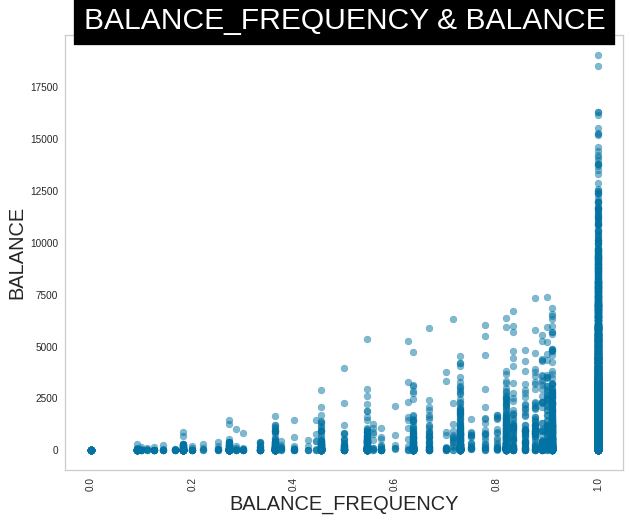

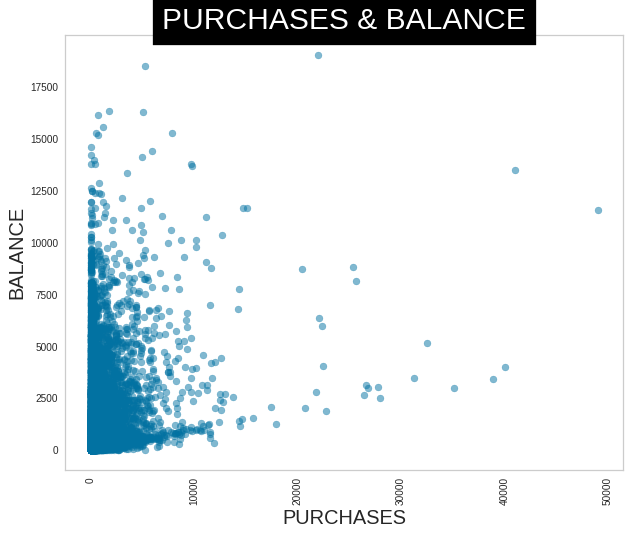

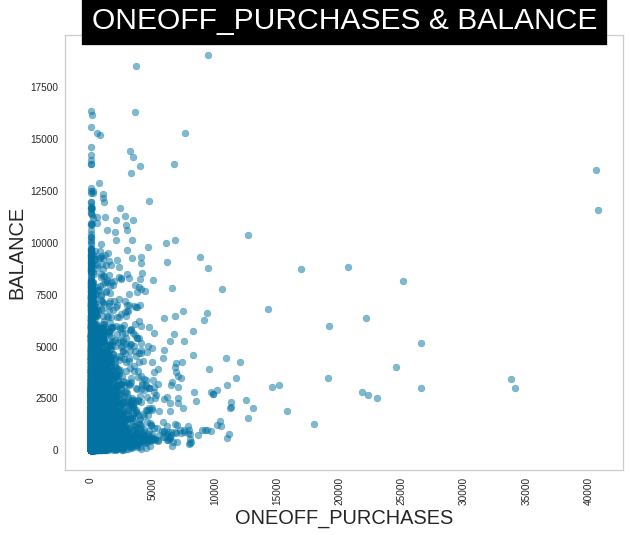

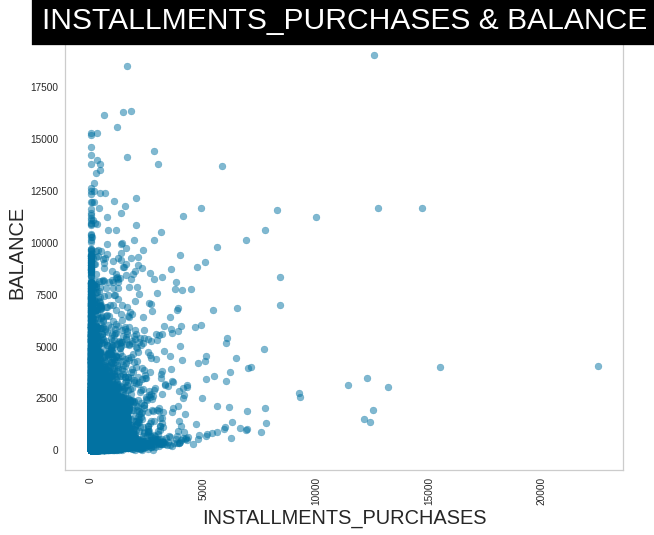

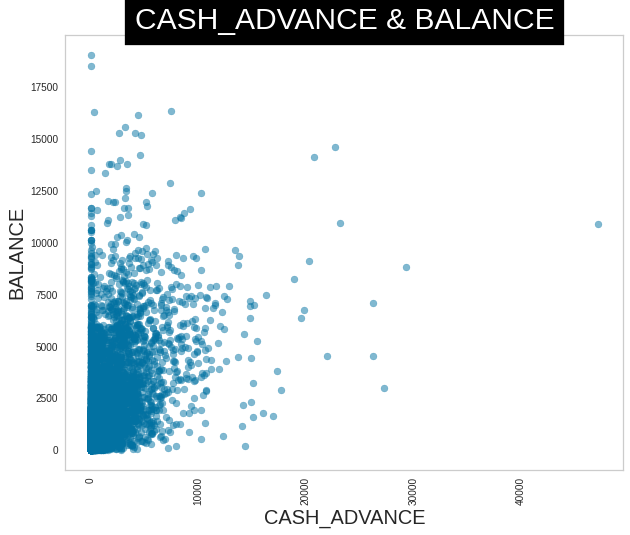

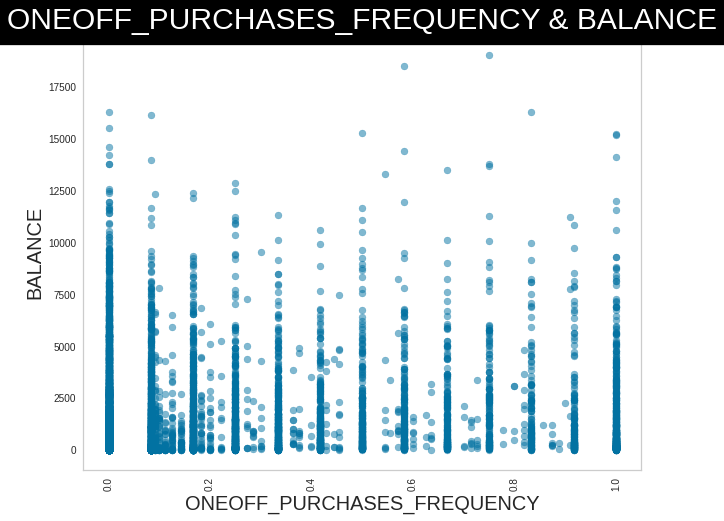

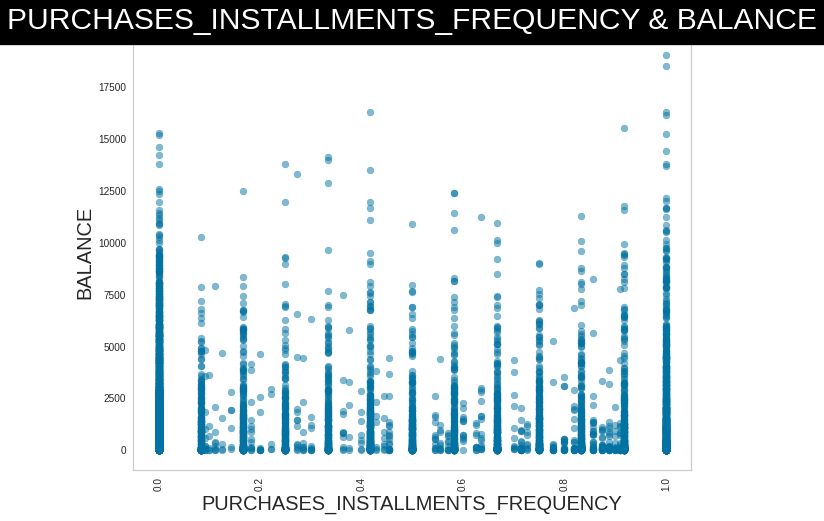

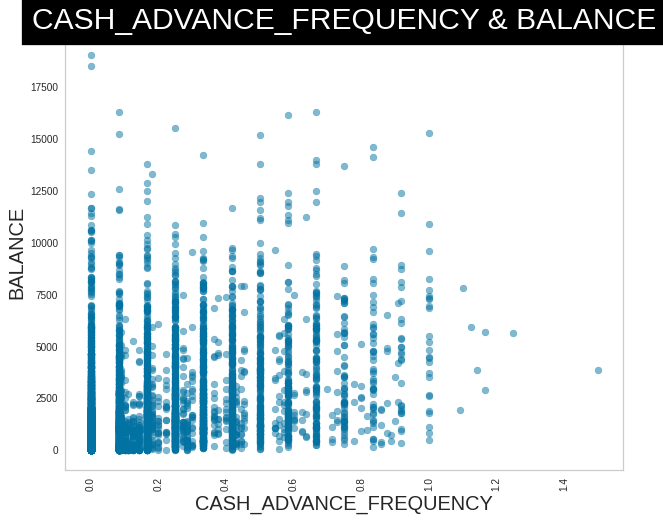

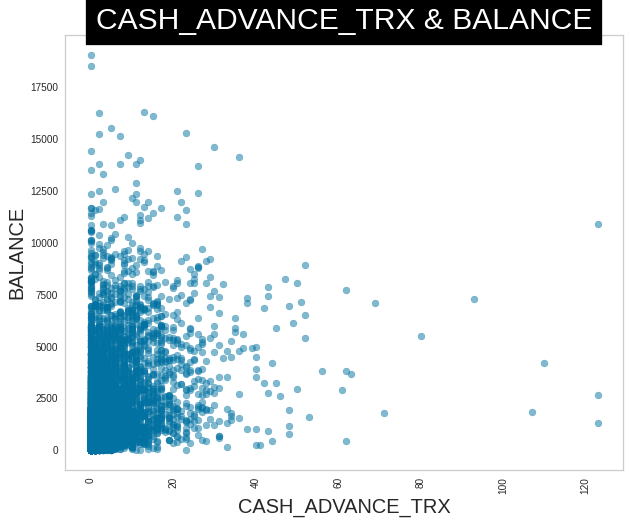

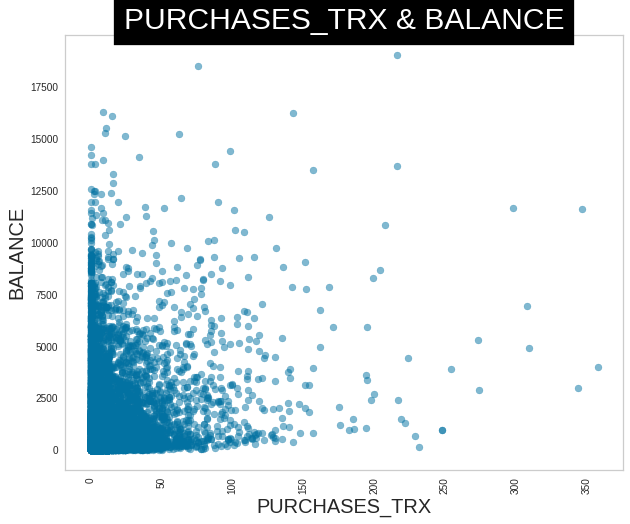

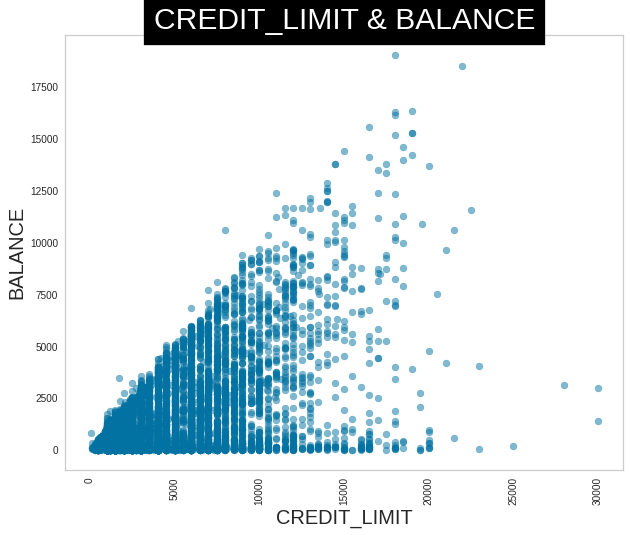

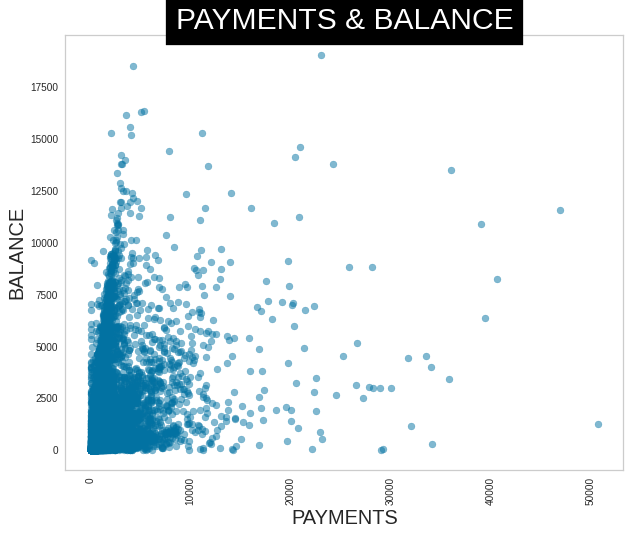

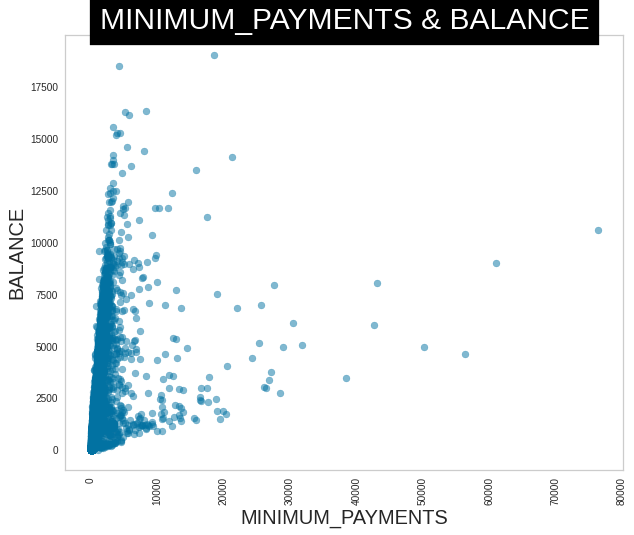

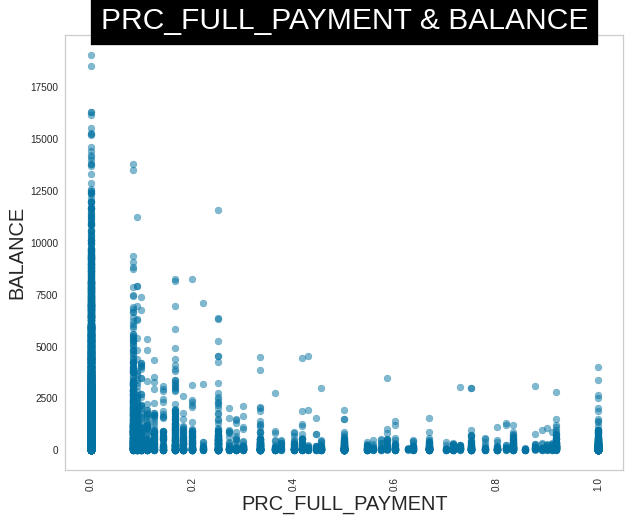

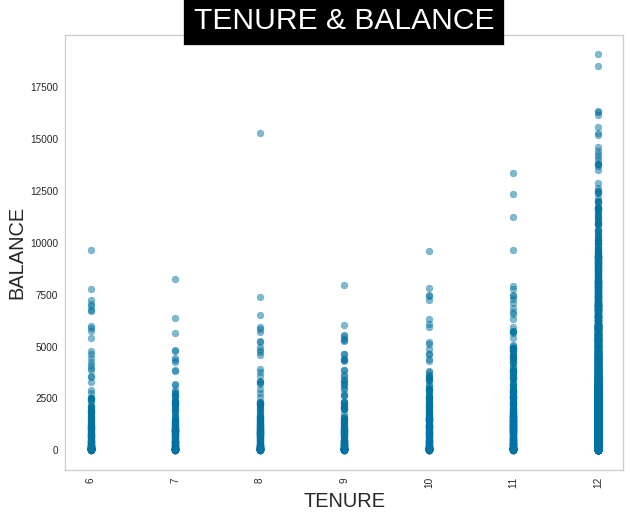

In [ ]:
for column in df.drop(columns=['BALANCE',"PURCHASES_FREQUENCY",]).columns : 
    plt.figure(figsize=(10,8))
    plt.scatter(df[column],df.BALANCE , alpha=.5 )
    plt.title(column+" & BALANCE",backgroundcolor='black',color='white',fontsize=30)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=20)
    plt.ylabel("BALANCE",fontsize=20)
    plt.grid()
    plt.show()

#Preprocessing

## Remove Null Values
Pada Attribute CREDIT_LIMIT (1 Data) and MINIMUM_PAYMENTS (313 Data) memiliki missing data

In [ ]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [ ]:
## Cek Ulang setelah melakukan input missing value
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Cek Outliers
Mencari Data Outliers menggunakan Boxplot




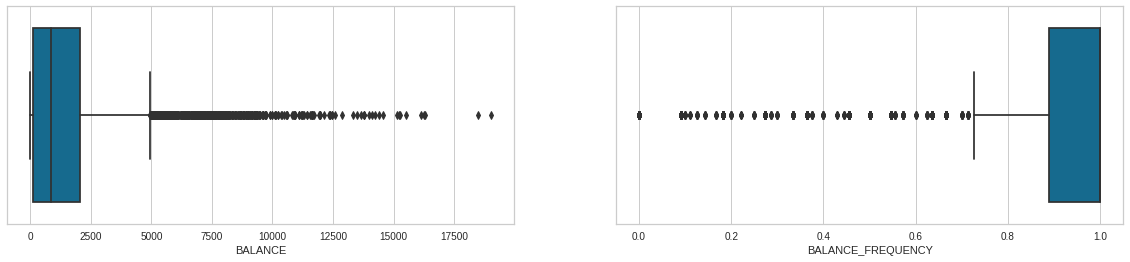

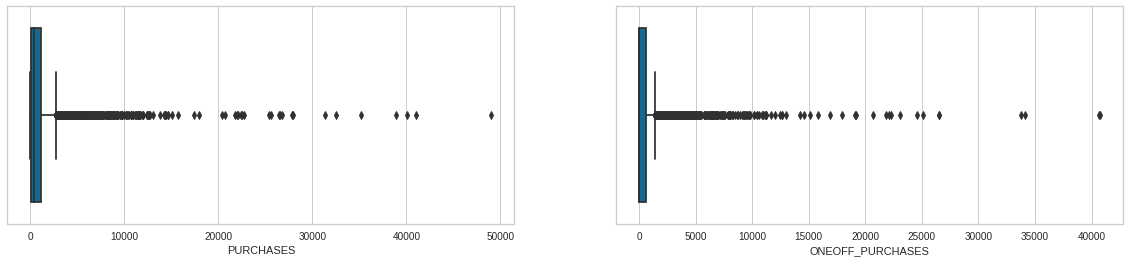

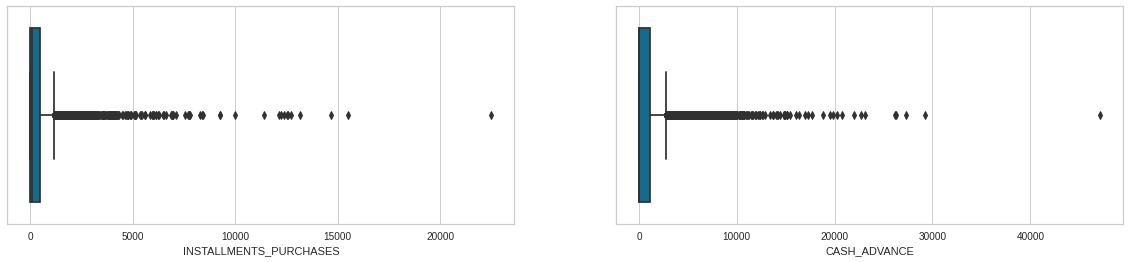

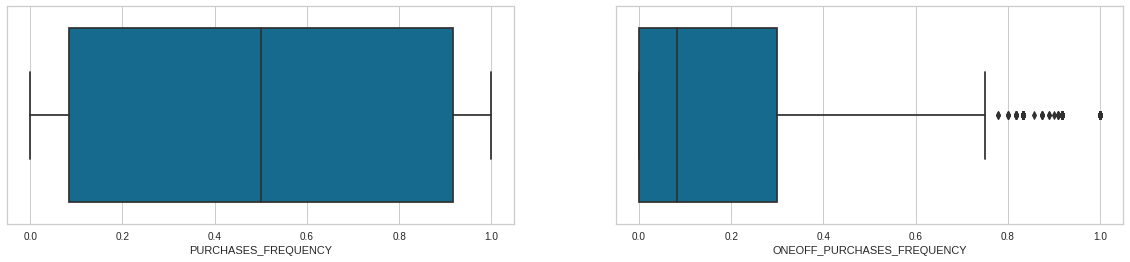

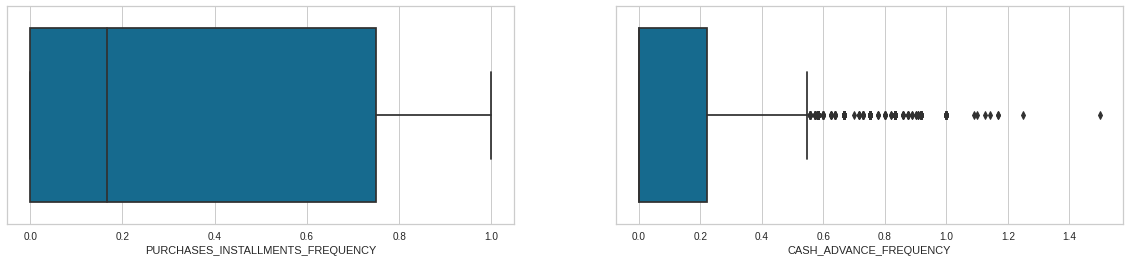

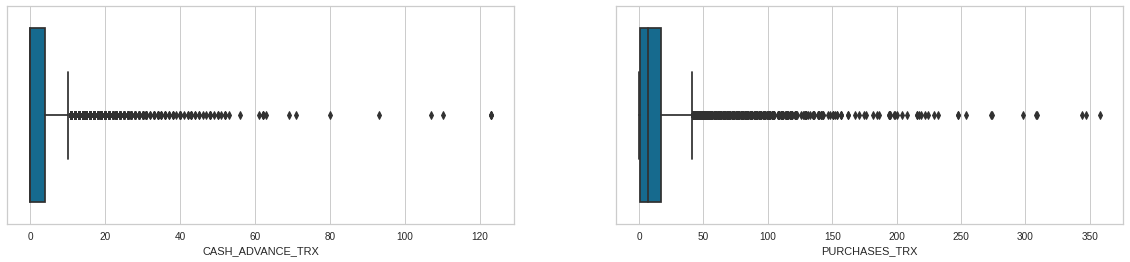

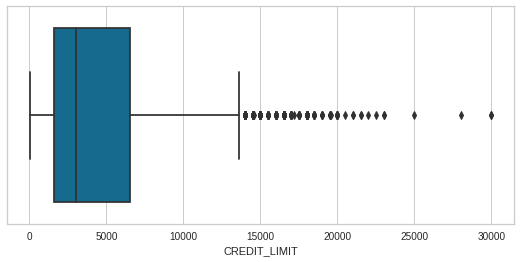

In [ ]:
## Menampilkan Outliers

i = 0
while i <17:
    fig = plt.figure(figsize =[20,4])
    plt.subplot(1,2,1)   #(satu row, dua plots, data pertama)
    sns.boxplot(x =numerical_features[i], data = df )
    i+=1
    if i==13:
        break
    plt.subplot(1,2,2)
    sns.boxplot(x =numerical_features[i], data = df)
    i+=1
  
    plt.show()

In [ ]:
# Persentase Outliers pada setiap variable
outlier_percentage = {}
for feature in numerical_features:
  # Sorting data dari B ke T
    tempData = data.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
    print("Nama Attribute :" , feature)
    print("Q1 :" , Q1)
    print("Q3 :" , Q3)
    print("IQR :" , IQR)
    print("Lower_range :" , Lower_range)
    print("Upper_range :" , Upper_range)
    print("\n")


print("Outlier Persentase :")
outlier_percentage

Nama Attribute : BALANCE
Q1 : 128.2819155
Q3 : 2054.1400355
IQR : 1925.85812
Lower_range : -2760.5052645
Upper_range : 4942.9272155


Nama Attribute : BALANCE_FREQUENCY
Q1 : 0.888889
Q3 : 1.0
IQR : 0.11111099999999996
Lower_range : 0.7222225000000001
Upper_range : 1.1666664999999998


Nama Attribute : PURCHASES
Q1 : 39.635
Q3 : 1110.13
IQR : 1070.4950000000001
Lower_range : -1566.1075000000003
Upper_range : 2715.8725000000004


Nama Attribute : ONEOFF_PURCHASES
Q1 : 0.0
Q3 : 577.405
IQR : 577.405
Lower_range : -866.1075
Upper_range : 1443.5124999999998


Nama Attribute : INSTALLMENTS_PURCHASES
Q1 : 0.0
Q3 : 468.6375
IQR : 468.6375
Lower_range : -702.95625
Upper_range : 1171.59375


Nama Attribute : CASH_ADVANCE
Q1 : 0.0
Q3 : 1113.8211392500002
IQR : 1113.8211392500002
Lower_range : -1670.7317088750003
Upper_range : 2784.5528481250003


Nama Attribute : PURCHASES_FREQUENCY
Q1 : 0.083333
Q3 : 0.916667
IQR : 0.833334
Lower_range : -1.166668
Upper_range : 2.166668


Nama Attribute : ONEOFF

{'BALANCE': 7.77,
 'BALANCE_FREQUENCY': 16.68,
 'PURCHASES': 9.03,
 'ONEOFF_PURCHASES': 11.32,
 'INSTALLMENTS_PURCHASES': 9.69,
 'CASH_ADVANCE': 11.51,
 'PURCHASES_FREQUENCY': 0.0,
 'ONEOFF_PURCHASES_FREQUENCY': 8.74,
 'PURCHASES_INSTALLMENTS_FREQUENCY': 0.0,
 'CASH_ADVANCE_FREQUENCY': 5.87,
 'CASH_ADVANCE_TRX': 8.98,
 'PURCHASES_TRX': 8.56,
 'CREDIT_LIMIT': 2.77,
 'PAYMENTS': 9.03,
 'MINIMUM_PAYMENTS': 9.4,
 'PRC_FULL_PAYMENT': 16.47,
 'TENURE': 15.26}

## Mengatasi Outlier
Dikarenakan banyak ditemukan data Outliers pada dataset ini sehingga solusi dari saya dengan mengubah data numerical continues ini menjadi categorical.

In [ ]:
# Mengubah Kolom berikut menjadi kategorical dengan range berikut
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    df[Range]=0        
    df.loc[((df[c]>0)&(df[c]<=500)),Range]=1
    df.loc[((df[c]>500)&(df[c]<=1000)),Range]=2
    df.loc[((df[c]>1000)&(df[c]<=3000)),Range]=3
    df.loc[((df[c]>3000)&(df[c]<=5000)),Range]=4
    df.loc[((df[c]>5000)&(df[c]<=10000)),Range]=5
    df.loc[((df[c]>10000)),Range]=6

In [ ]:
# Mengubah Kolom berikut menjadi kategorical dengan range berikut
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    df[Range]=0
    df.loc[((df[c]>0)&(df[c]<=0.1)),Range]=1
    df.loc[((df[c]>0.1)&(df[c]<=0.2)),Range]=2
    df.loc[((df[c]>0.2)&(df[c]<=0.3)),Range]=3
    df.loc[((df[c]>0.3)&(df[c]<=0.4)),Range]=4
    df.loc[((df[c]>0.4)&(df[c]<=0.5)),Range]=5
    df.loc[((df[c]>0.5)&(df[c]<=0.6)),Range]=6
    df.loc[((df[c]>0.6)&(df[c]<=0.7)),Range]=7
    df.loc[((df[c]>0.7)&(df[c]<=0.8)),Range]=8
    df.loc[((df[c]>0.8)&(df[c]<=0.9)),Range]=9
    df.loc[((df[c]>0.9)&(df[c]<=1.0)),Range]=10

In [ ]:
# Mengubah Kolom berikut menjadi kategorical dengan range berikut
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    df[Range]=0
    df.loc[((df[c]>0)&(df[c]<=5)),Range]=1
    df.loc[((df[c]>5)&(df[c]<=10)),Range]=2
    df.loc[((df[c]>10)&(df[c]<=15)),Range]=3
    df.loc[((df[c]>15)&(df[c]<=20)),Range]=4
    df.loc[((df[c]>20)&(df[c]<=30)),Range]=5
    df.loc[((df[c]>30)&(df[c]<=50)),Range]=6
    df.loc[((df[c]>50)&(df[c]<=100)),Range]=7
    df.loc[((df[c]>100)),Range]=8

In [ ]:
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,1,1,9,2,0,1,0,0,1,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,4,3,10,0,0,0,3,3,0,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,2,2,10,10,10,0,0,0,3,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0,2,7,1,1,0,1,0,1,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,2,1,10,1,1,0,0,0,1,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,...,3,3,10,7,0,6,0,0,2,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,...,5,1,10,10,10,10,0,10,7,0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,...,2,2,10,10,0,10,0,0,3,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,...,2,1,10,4,1,3,0,0,1,0
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,...,3,1,6,2,2,0,0,0,1,0


## Melakukan *Normalisasi Standard Scaller* 
Setelah mengatasi outlier, proses berikutnya melakukan normalisasi dengan standar scaler




In [ ]:
#Menghapus nama kolom dan hanya melakukan proses pada datanya saja untuk normalisasi
df.drop([ 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)
X= np.asarray(df)

#Normalizing input values.
from sklearn. preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)


#Menyimpan data normalisasi ke scaled_features_df.
scaled_features_df = pd.DataFrame(scaled_features, columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'])

scaled_features_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.36068,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.513383,-1.038243,-0.678535,0.030404,-0.771610,-0.708951,-0.694434,-0.708130,-0.541199,-0.646812,-0.694622
1,0.36068,1.297983,-1.180155,-0.802193,-0.871405,2.382407,1.039345,1.293765,1.355251,0.472155,-1.264994,-0.708951,-0.939271,0.690317,0.452999,-1.099712,0.125978
2,0.36068,0.539152,0.302910,0.772805,-0.871405,-0.786629,1.039345,-0.260907,0.338358,0.472155,1.201929,2.515681,-0.939271,-0.708130,-0.541199,0.258988,-0.694622
3,0.36068,0.539152,1.044443,1.560304,-0.871405,-0.152822,1.039345,-1.815578,0.338358,-0.853097,-1.018302,-0.386487,-0.939271,-0.241981,-0.541199,-0.646812,0.125978
4,0.36068,-0.219680,-0.438623,-0.014694,-0.871405,-0.786629,-0.662473,-0.260907,-0.678535,0.472155,-1.018302,-0.386487,-0.939271,-0.708130,-0.541199,-0.646812,-0.694622
5,0.36068,0.539152,1.044443,-0.802193,1.899465,-0.786629,-0.662473,0.516429,1.355251,0.472155,0.461852,-0.708951,0.529751,-0.708130,-0.541199,-0.193912,-0.694622
6,0.36068,-0.219680,2.527508,3.135302,0.975842,-0.786629,1.890255,2.071100,-0.678535,0.472155,1.201929,2.515681,1.509098,-0.708130,2.772792,2.070589,-0.694622
7,0.36068,0.539152,-0.438623,-0.802193,0.052218,-0.786629,-0.662473,-0.260907,0.338358,0.472155,1.201929,-0.708951,1.509098,-0.708130,-0.541199,0.258988,-0.694622
8,0.36068,0.539152,0.302910,0.772805,0.052218,-0.786629,1.039345,-0.260907,-0.678535,0.472155,-0.278225,-0.386487,-0.204760,-0.708130,-0.541199,-0.646812,-0.694622
9,0.36068,-0.978511,1.044443,1.560304,-0.871405,-0.786629,1.890255,0.516429,-0.678535,-1.294848,-0.771610,-0.064024,-0.939271,-0.708130,-0.541199,-0.646812,-0.694622


# K-Means Clustering

### Use elbow method to find optimal number of clusters 

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.8/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


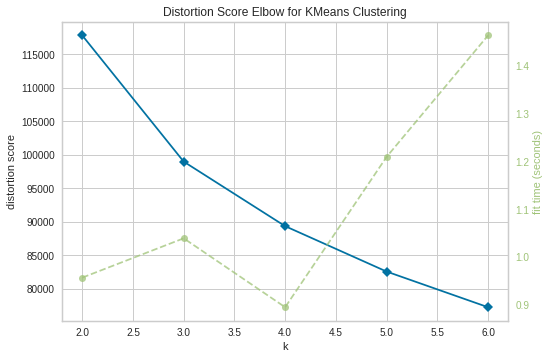

In [ ]:
model = KMeans(random_state=10)
visualizer = KElbowVisualizer(model, k=(2,7))

visualizer.fit(scaled_features_df)
visualizer.show()
plt.show()

### Silhouette Coefficient:


In [ ]:
# Pengaturan pembagian kelompok
X, y = make_blobs(n_samples=8636, n_features=17, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)

For n_clusters = 2 The average silhouette_score is : 0.6717863877128462
For n_clusters = 3 The average silhouette_score is : 0.8187667047602735
For n_clusters = 4 The average silhouette_score is : 0.5664318160508234
For n_clusters = 5 The average silhouette_score is : 0.31401638306447627
For n_clusters = 6 The average silhouette_score is : 0.041505328608170806


<function matplotlib.pyplot.show(*args, **kw)>

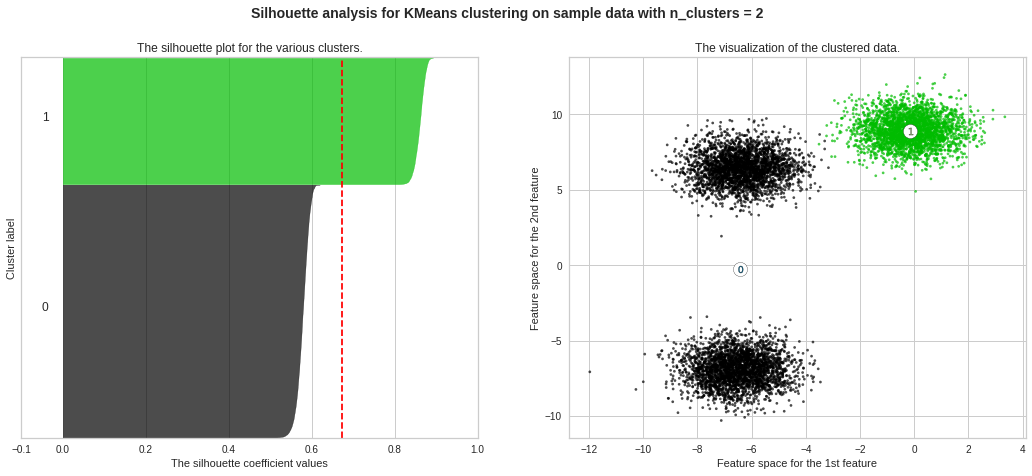

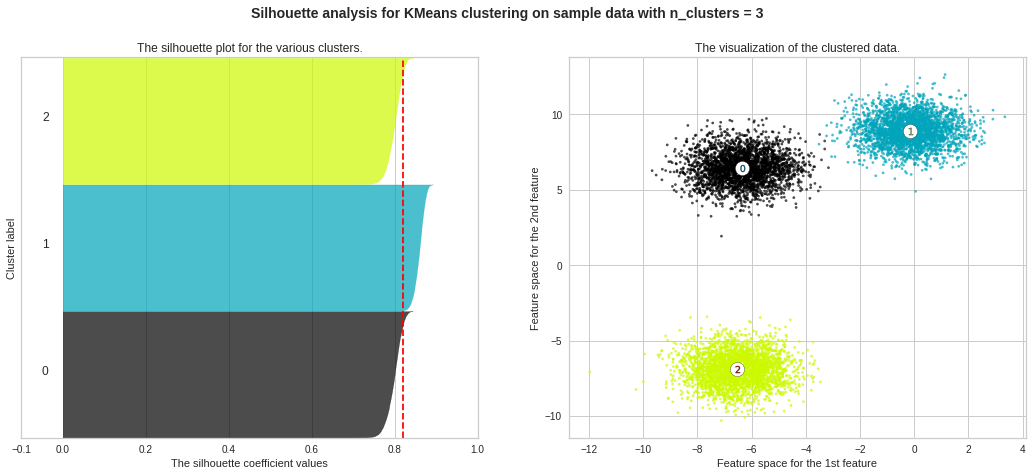

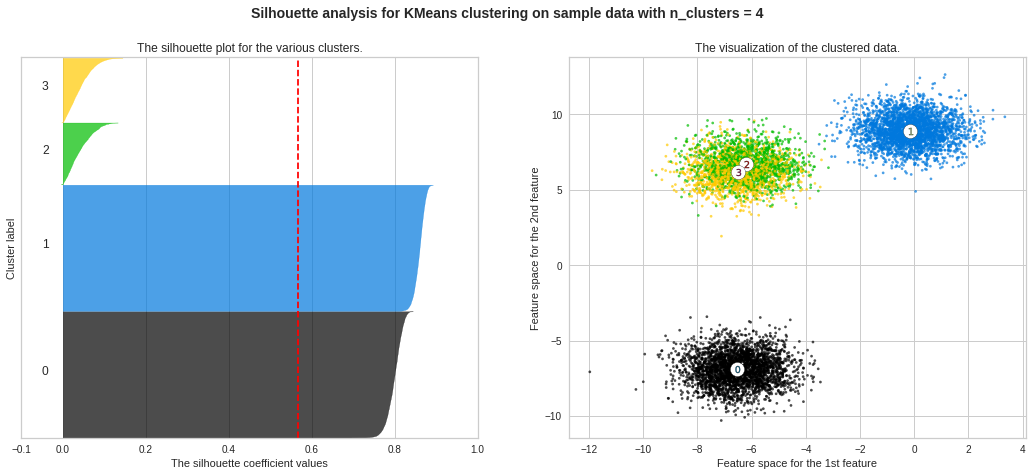

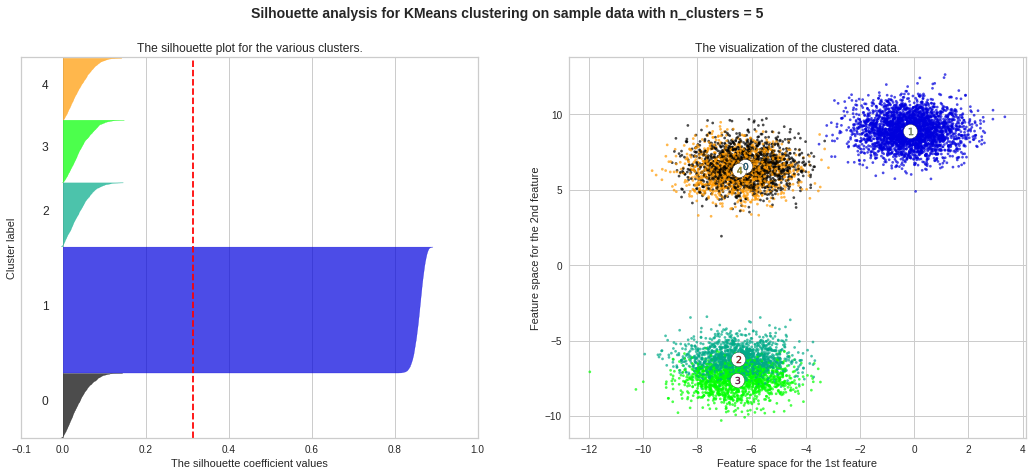

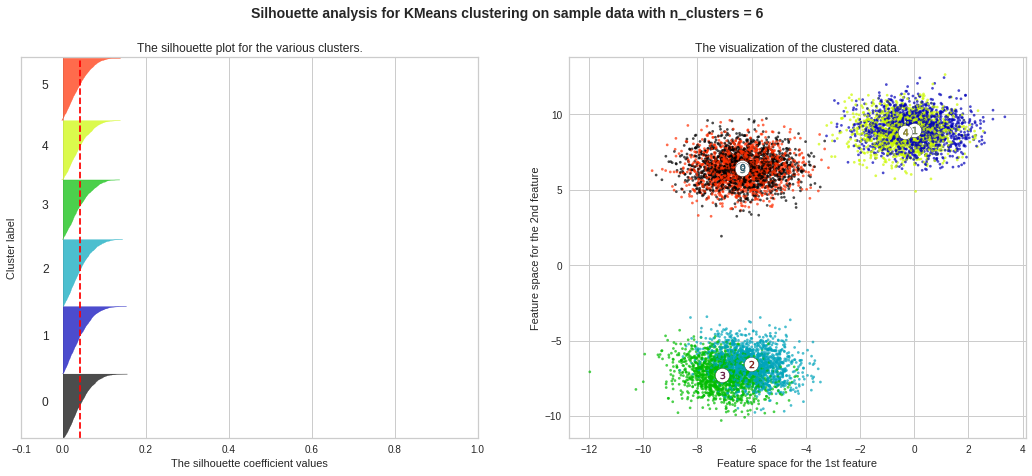

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # membuat subplot denga 1 baris dan 2 kolom
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Subplot pertama adalah plot siluet
    # Koefisien berkisaran dari -1 sampai 1
    # nilai [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # inisialisasi clusterer dengan nilai n cluster dan generator acak
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Silhouette score memberikan nilai rata - rata untuk semua sampel
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Menghitung skor siluet untuk setiap sampel
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
       
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Pemberial label pada plot siluet dengan nomor klaster
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    #pemberian label pada klaster
    centers = clusterer.cluster_centers_
  
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show

### Jumlah cluster = 3 merupakan pilihan terbaik dalam pembagian klaster. Skor siluet berkisar dari −1 hingga +1, di mana nilai yang tinggi menunjukkan bahwa objek tersebut sangat cocok dengan klasternya sendiri dengan skor 0,81.

In [ ]:
# The best K = 3
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(X)

In [ ]:
cluster_labels

array([1, 0, 2, ..., 0, 0, 2], dtype=int32)

In [ ]:
clusters=pd.concat([df, pd.DataFrame({'cluster':cluster_labels})], axis=1)
clusters.head(10)

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,1.0
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,0.0
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,2.0
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1,0.0
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,0.0
5,12,3,3,0,3,0,3,3,3,10,7,0,6,0,0,2,0,2.0
6,12,2,5,5,2,0,6,5,1,10,10,10,10,0,10,7,0,0.0
7,12,3,1,0,1,0,3,2,2,10,10,0,10,0,0,3,0,1.0
8,12,3,2,2,1,0,5,2,1,10,4,1,3,0,0,1,0,2.0
9,12,1,3,3,0,0,6,3,1,6,2,2,0,0,0,1,0,2.0


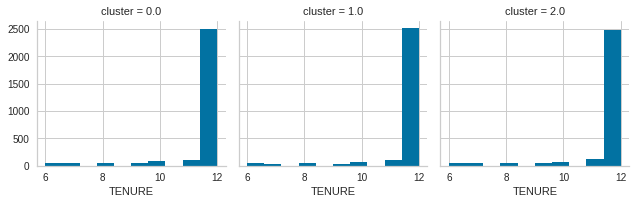

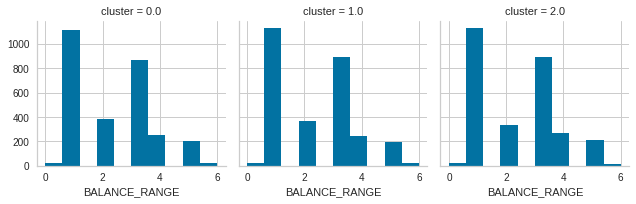

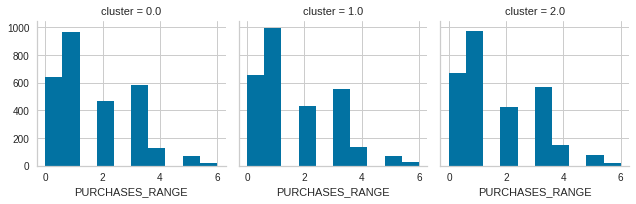

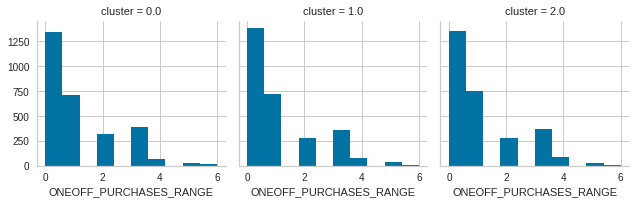

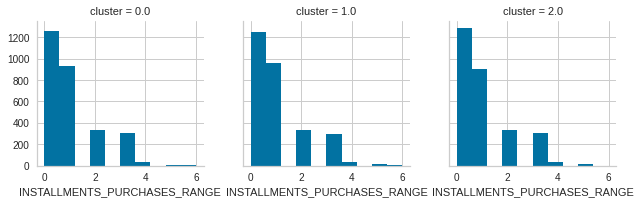

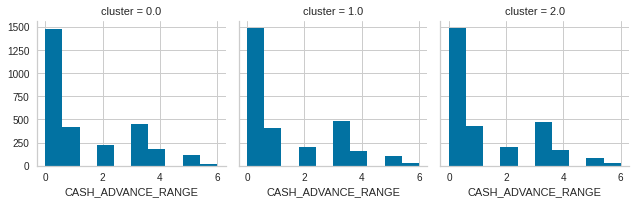

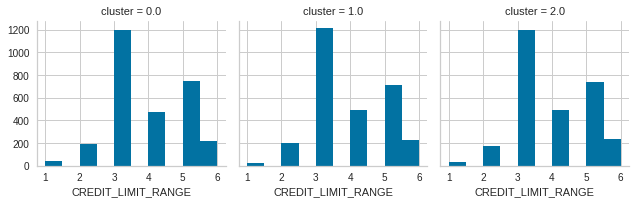

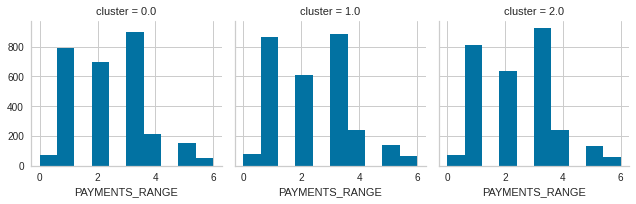

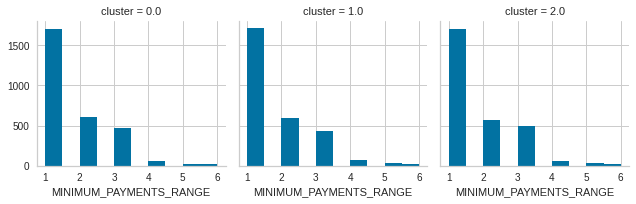

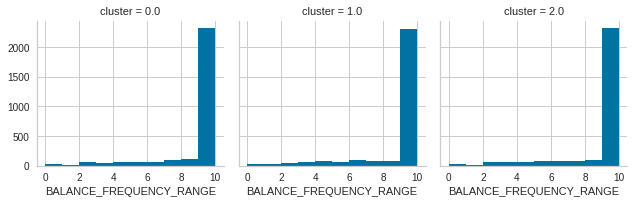

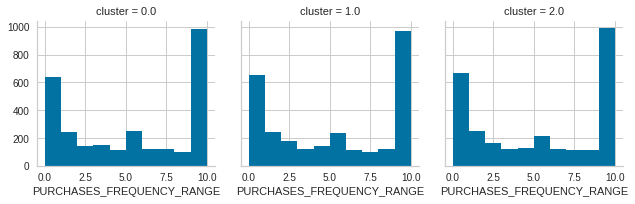

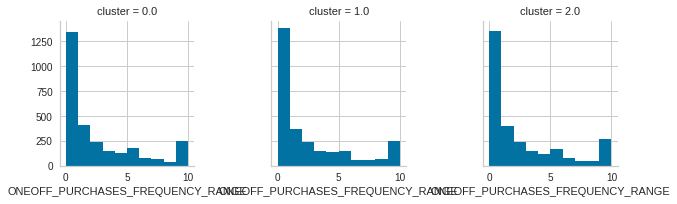

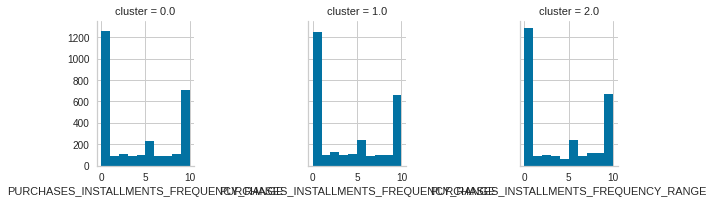

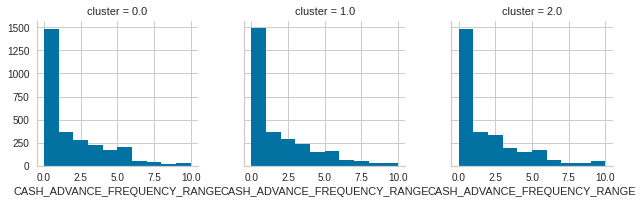

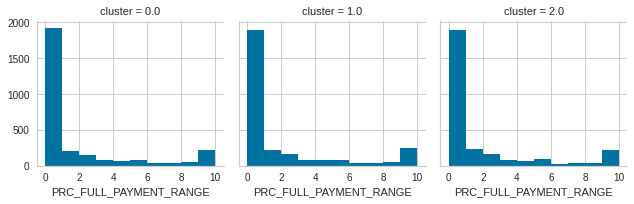

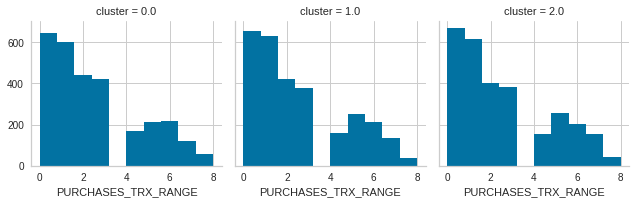

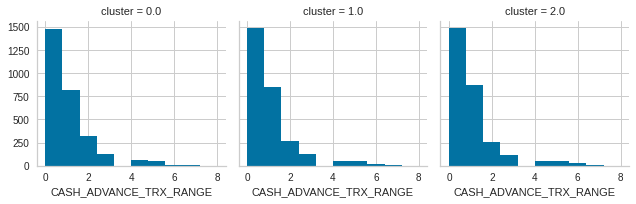

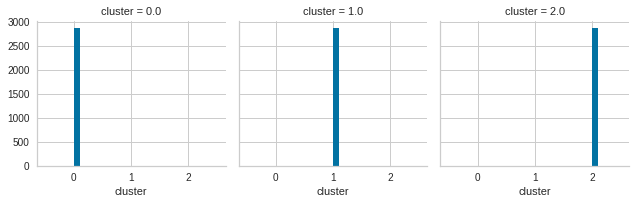

In [ ]:
#Show cluster
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)


### Visualization of Clusters
Using PCA to transform data to 2 dimensions for visualization

In [ ]:
pca = PCA(n_components=3)
pca.fit(X)
PCA_ds = pd.DataFrame(pca.transform(X), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,8636.0,1.474401e-15,17.923799,-15.919274,-12.986740,-11.942826,24.626797,28.891633
col2,8636.0,-3.416134e-15,11.539299,-17.952865,-13.358449,-0.120092,13.453541,18.578333
col3,8636.0,5.322900e-15,1.033848,-3.610020,-0.700918,0.008012,0.695495,3.604080


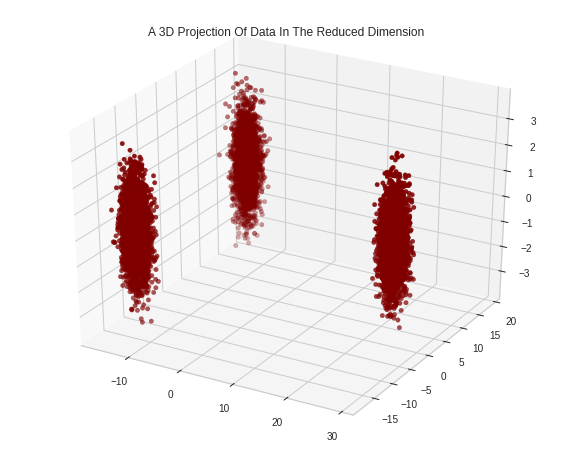

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o" , c="maroon")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [ ]:
# Jumlah data setiap klaster
pd.Series(cluster_labels).value_counts()

1    2879
2    2879
0    2878
dtype: int64

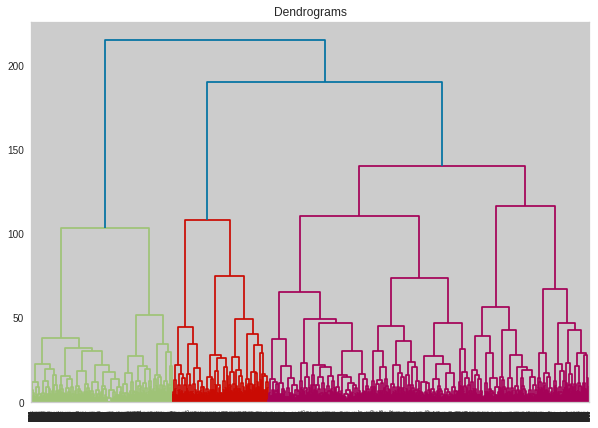

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_features_df, method='ward'))

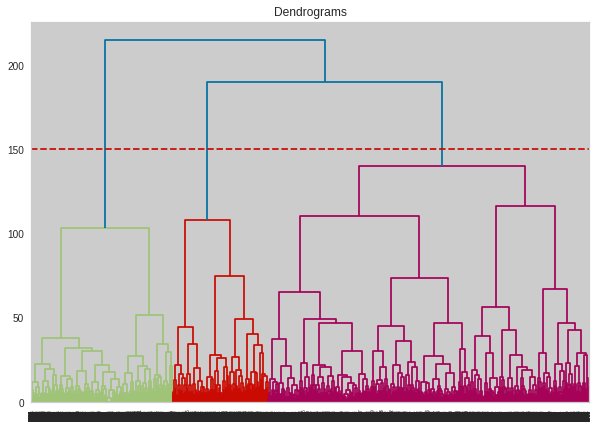

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_features_df, method='ward'))
plt.axhline(y=150, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(scaled_features_df)

array([0, 1, 0, ..., 0, 0, 0])